In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

import torch.optim as optim

from load_datasets import load_datasets
from torch.utils.data import DataLoader
from utils import *
# from model import *
from model import *
from save_obj import *
import pickle as pkl
from TorchCoder import *

In [2]:
import easydict

args = easydict.EasyDict({
    'path':'./dataset/test/',
    'mode':'train',
    'pretrained_mode':False,
    'time_limited':5,
    'down_sampling':False,
    'down_sampling_rate':16000,
    'n_mfcc':16,
    'windows':5,
    'hidden_size':42,
    'num_layers':2,
    'batch_size':64,
    'epoch':20,
    'pretrained_model':'./model.pt'
})


In [3]:
datasets = load_datasets(args)

	(1.020 sec)


In [4]:
data_loader = DataLoader(
        datasets, 
        batch_size=args.batch_size, 
        shuffle=False
    )
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[+] {device} is available")

[+] cpu is available


In [5]:
for data, labels in data_loader:
    inputs = data

In [6]:
inputs.shape

torch.Size([2, 431, 16])

In [7]:
tmp = []
for idx in range(len(inputs)):
    _tmp = inputs[idx]
    _tmp = torch.transpose(_tmp, 1, 0)
    _tmp = _tmp.cpu().detach().numpy()
    tmp.append(_tmp)
    
len(tmp)

2

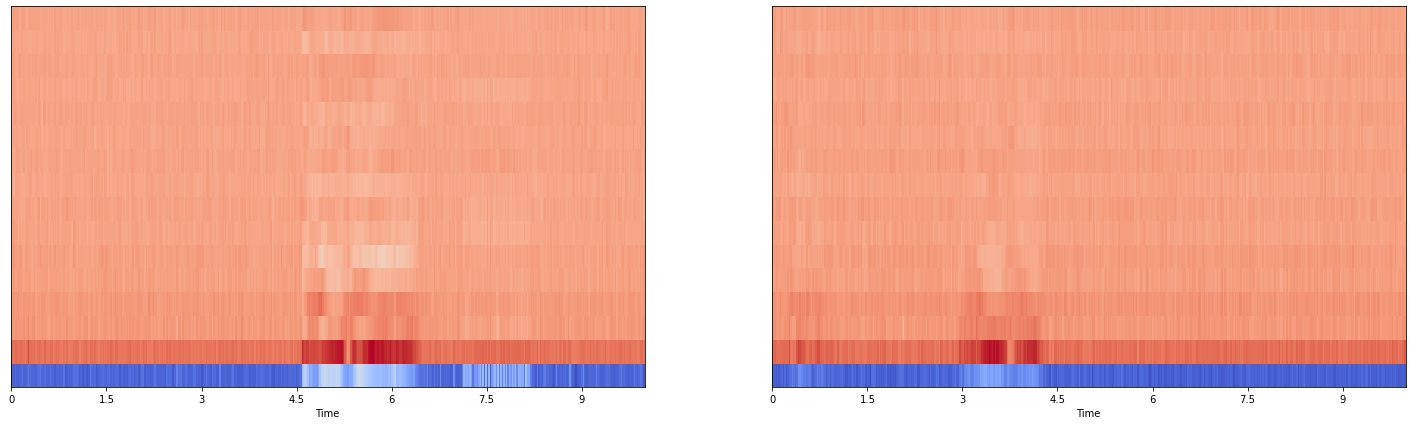

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(25, 7))

result = []
for idx in range(len(tmp)):
    result.append(librosa.display.specshow(tmp[idx], x_axis='time', ax=ax[idx]))

plt.show()